# **Project Name**    -  Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### By                - Hrushikesh Sutar

# **Project Summary -**

Yes Bank is a banking company that was founded in 2004 that offers a wide range of differentiated products for its corporate and retail customers through retail banking and asset management services. It is also a publically traded company. That provides an opportunity for anyone to invest in Yes bank and become a shareholder. But at the same time, it means that the valuation of the company is now in the hands of investors and speculators as share prices are often heavily impacted by public opinion. We have used yes bank stock price data set. This dataset contains 5 different features that can be used for predicting close price prediction using machine learning.

In this project i have applied three different model and check the performance of each model through different metrics and findind the best one from it.

This project involve follwing steps.

Firstally i have dealt with cleaning and preprocessing of the data removing inconcistencies from the data like checking null values duplicates and handling null values and dropping irrelevant data these all steps comes under Data Wrangling.

Secondally we do Visualization of varibles through different chart and then done hypotheses testing,feature engineering.

In the third part i applied three different model namely Linear Regression,Random Forest Regressor and XGBoost Regressor and check performance of metrics through these models.

The project concludes that Linear Regression is best model according to other models in term of R2 score.

Overall, the project aimed to contribute to a better understanding of the relationship between the fraud case and Yes Bank's stock prices, and to explore the potential of predictive models in the financial domain. The findings and insights gained from this project can be utilized by investors, analysts, and decision-makers to make informed investment or business decisions related to Yes Bank's stock.


# **GitHub Link -**


# https://github.com/hrushi825/yes-bank-capstone-project-of-machine-learning-

# **Problem Statement**


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import math
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (r2_score,
mean_squared_error,  mean_absolute_percentage_error,
mean_absolute_error)
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-cff3e84db638>:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Machine Learning /data_YesBank_StockPrices.csv')


### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rows_columns_df = df.shape
print("No of rows and columns in dataset:",rows_columns_df)

No of rows and columns in dataset: (185, 5)


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

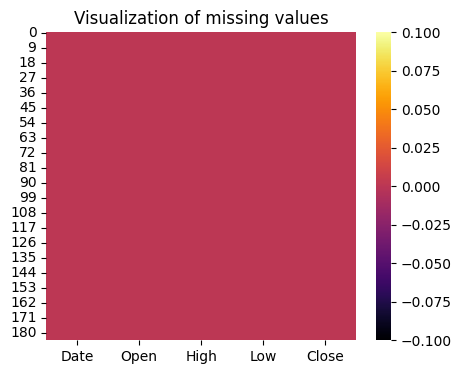

In [ ]:
# Visualizing the missing values

# plotting the chart
plt.figure(figsize=(5,4))
sns.heatmap(df.isnull(),cmap='inferno')

# Setting title
plt.title('Visualization of missing values')

# Show chart
plt.show()


### What did you know about your dataset?

There are 185 rows and 5 columns in our dataset.There is no duplicated as well as no missing/null values in the dataset.Among the 5 columns, 4 are independent variables (Date, open,high,low) and 1 is dependent variable(close).

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

Date - Date of the record. It has monthly dates from July 2005 to November 2020. data type is object need to change into datetime

Open- opening price of the share/stock (Numerical)

High - Highest price of the share for that day (Numerical)

Low - Lowest Price of the share for that day (Numerical)

Close - Closing price of the share for that day (Numerical)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
pd.Series({col:df[col].unique() for col in df})

Date     [Jul-05, Aug-05, Sep-05, Oct-05, Nov-05, Dec-0...
Open     [13.0, 12.58, 13.48, 13.2, 13.35, 13.49, 13.68...
High     [14.0, 14.88, 14.87, 14.47, 13.88, 14.44, 17.1...
Low      [11.25, 12.55, 12.27, 12.4, 12.88, 13.0, 13.58...
Close    [12.46, 13.42, 13.3, 12.99, 13.41, 13.71, 15.3...
dtype: object

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#copy of my dataset
yb_df= df.copy()

In [ ]:
yb_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
# missing values

yb_df.isnull().sum()


Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
# checking for duplicates
yb_df.duplicated().sum()

0

In [ ]:
#converting datatype of Date from string to Datetime

from datetime import datetime

yb_df['Date']=pd.to_datetime(yb_df['Date'].apply(lambda x: datetime.strptime(x,'%b-%y')))

In [ ]:
# checking after conversion
yb_df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
yb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [ ]:
yb_df.shape

(185, 5)

In [ ]:
 # setting Date column as index.
yb_df.set_index('Date', inplace=True)

In [ ]:
yb_df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
# checking numerical columns in dataset

col = yb_df.columns.to_list()
numerical_columns=col[0:4]
print('Numerical columns in dataset are:',numerical_columns)

Numerical columns in dataset are: ['Open', 'High', 'Low', 'Close']


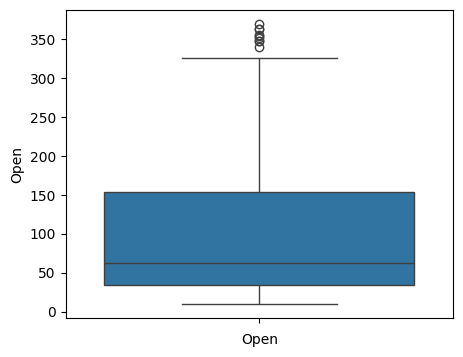

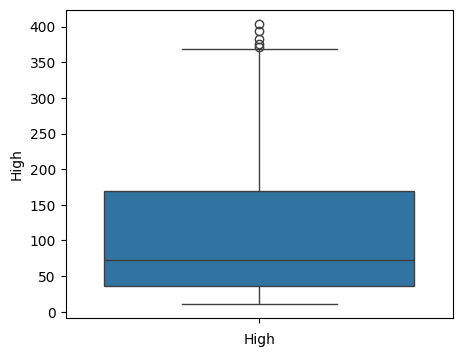

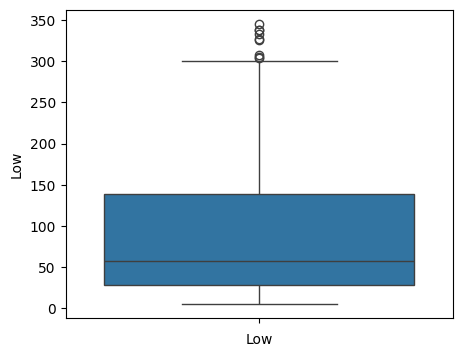

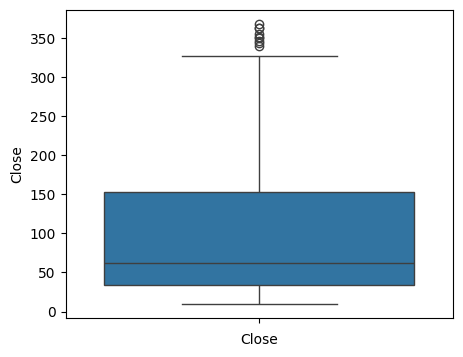

In [ ]:
# Checking all features for presence of outliers.

for col in numerical_columns:
  plt.figure(figsize=(5,4))
  sns.boxplot(yb_df[col])
  plt.xlabel(col, fontsize=10)
  plt.show()


In [ ]:
# Separating the dependent and independent variables.

independent_variables = yb_df.columns.tolist()[:-1]
dependent_variable = ['Close']

print(independent_variables)
print(dependent_variable)

['Open', 'High', 'Low']
['Close']


### What all manipulations have you done and insights you found?



Firstly i made a copy of a dateset and stored as yb_df then i checked for missing values in dataset and got none missing values and as well as no duplicated value in the dataset so our data is free from missing and duplicated values.Then I converted the datatype of date column from string to datetime and set the date column as index and then checked numerical columns in dataset and found Open,High,Low,Close as numerical columns then checked for outliers in all the numerical columns and at the last separating dependent and independent variables.

Above steps I used for manipulations.

Following Insights are found after manipulating.



*   There are neither missing values nor duplicates in our dataset.

*   Numerical Columns:['Open' , 'High' , 'Low' , 'Close']




*   There are Outliers in data.

*   Dependent Variable - ['Close']


*   Independent Variable - ['Open' , 'High' , 'Low']









## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
Distribution of dependent variable

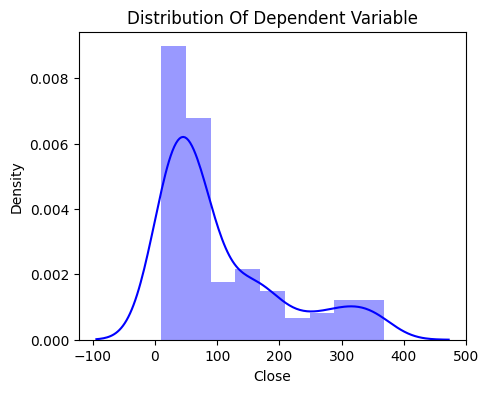

In [ ]:
# Chart - 1 visualization code

# Plotting the chart
plt.figure(figsize=(5,4))
sns.distplot(yb_df['Close'],kde=True,color = 'Blue')

# Setting title
plt.title("Distribution Of Dependent Variable")

# Show chart
plt.show()


##### 1. Why did you pick the specific chart?

Displot is used to represents the overall distribution of continous variables.It is used to depict the variation in the data distribution

##### 2. What is/are the insight(s) found from the chart?

We can see that distribution of dependent variable i.e close is right skewed as it has a longer tail on right side which indicates that it is positively skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This will let to know that we have to apply log transformation to make it normally distributed


#### Chart - 2

To show the closing price yearwise

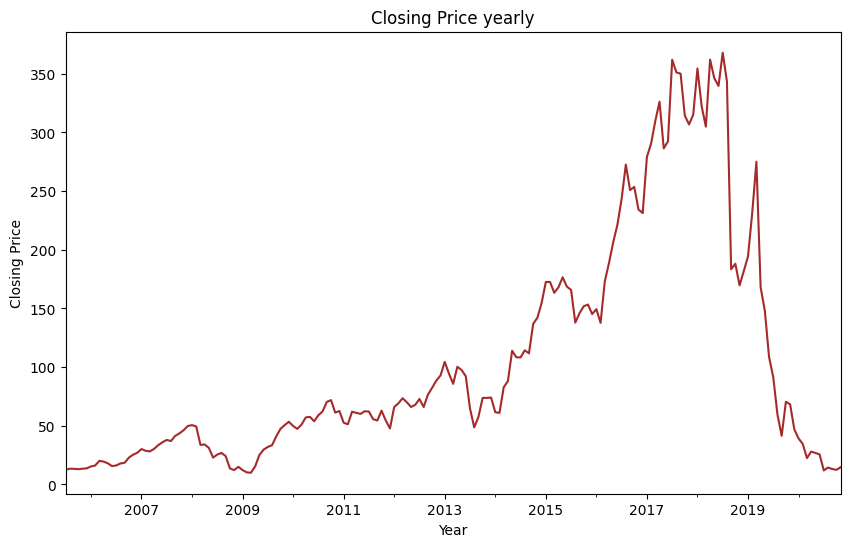

In [ ]:
# Chart - 2 visualization code

# Plotting the chart
plt.figure(figsize=(10,6))
yb_df['Close'].plot(color = 'Brown')

# Setting labels
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing Price yearly')

# Show chart
plt.show()


##### 1. Why did you pick the specific chart?

Line chart is used to show trends over time so here we have to show the closing price yearly so it is best for visualizing the problem.

##### 2. What is/are the insight(s) found from the chart?

We can clearly see from the chart that year 2018 has the highest closing price
and that was the year of fraud case involving Rana Kapoor then it took huge hit and dropped significantly

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, because of the 2018 fraud the yes bank stock has suffered immensily from 2018. That should not happen in the future.

#### Chart - 3
Distribution of all columns of dataset.

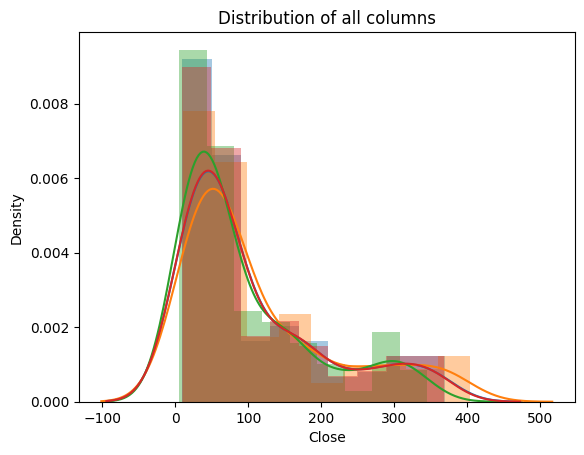

In [ ]:
# Chart - 3 visualization code

# plotting the chart
sns.distplot(df['Open'],kde=True)
sns.distplot(df['High'],kde=True)
sns.distplot(df['Low'],kde=True)
sns.distplot(df['Close'],kde=True)

# Setting title
plt.title("Distribution of all columns")

# Show chart
plt.show()


##### 1. Why did you pick the specific chart?

Displot is used to represents the overall distribution of continous variables.It is used to depict the variation in the data distribution.

##### 2. What is/are the insight(s) found from the chart?

We can see all our variables are right skewed and has longer tail i.e positively skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes from this we can know we have to apply log transformation to all the columns for making them normally distributed.

#### Chart - 4

Applying Log transformation to make all the variables normally distributed.

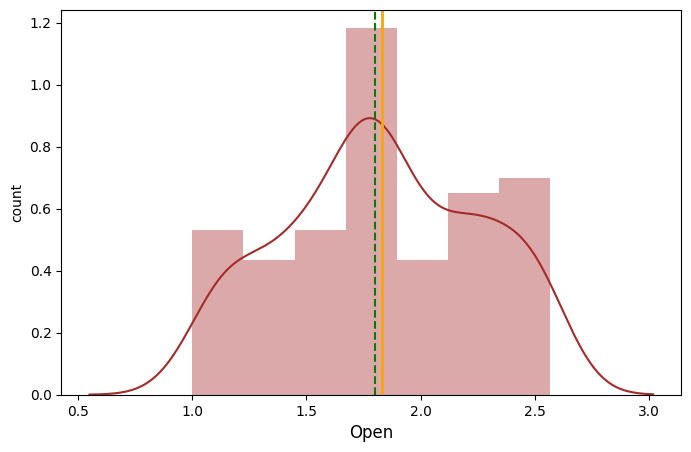

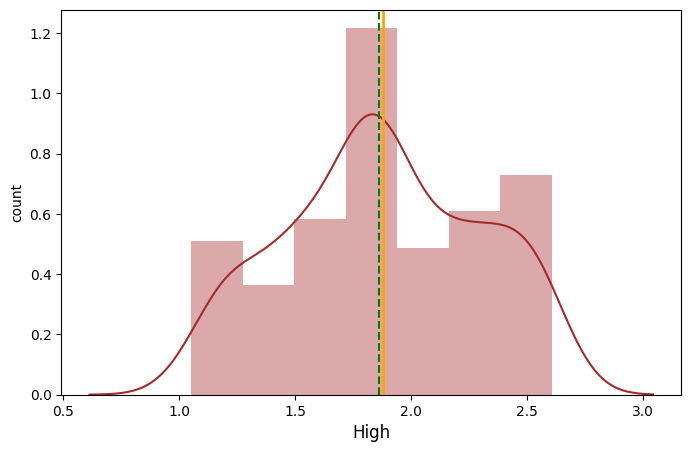

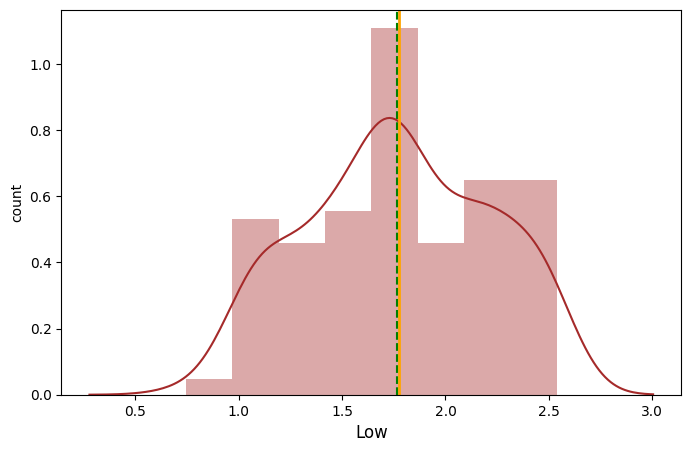

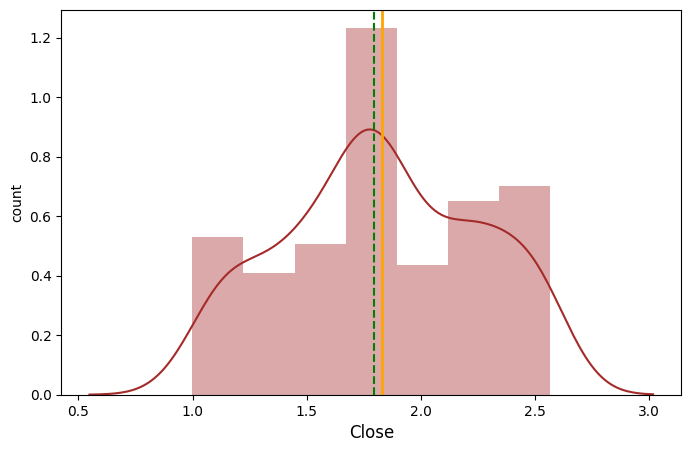

In [ ]:
# Chart - 4 visualization code

# Lets use log transformation on these features using np.log() and plot them.
for col in yb_df.columns:
  plt.figure(figsize=(8,5))
  sns.distplot(np.log10(yb_df[col]), color='Brown')
  plt.xlabel(col, fontsize=12)
  plt.ylabel('count')

  # Plotting the mean and the median.
  plt.axvline(np.log10(yb_df[col]).mean(),color='orange',linewidth=2)
  plt.axvline(np.log10(yb_df[col]).median(),color='green',linestyle='dashed',linewidth=1.5)
  plt.show()




##### 1. Why did you pick the specific chart?

Displot is used to represents the overall distribution of continous variables.It is used to depict the variation in the data distribution.

##### 2. What is/are the insight(s) found from the chart?

From this we can see that we have applied log tranformation on all the variables as our none of the variable was normally distributed all were right skewed so after apllying log transformation our variables become normally distributed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes from this we can see our variables normally distributed which makes easy to develop a good model.

#### Chart - 5
Presence of outliers after applying log transformation.

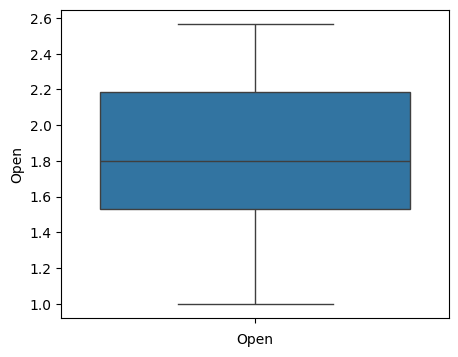

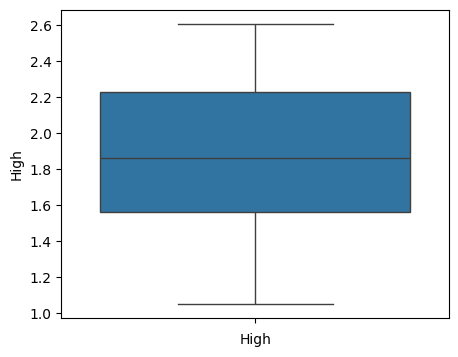

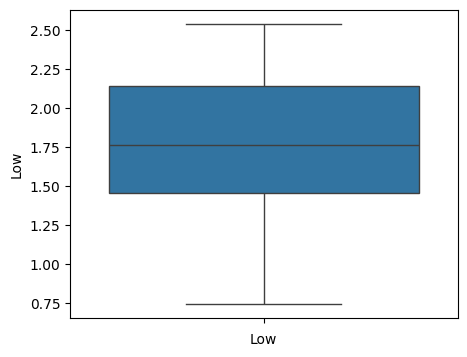

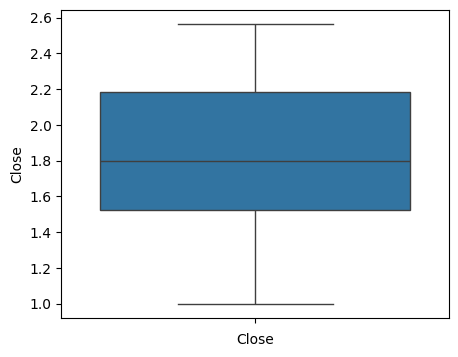

In [ ]:
# Chart - 5 visualization code

# Again Checking all features for presence of outliers in the transformed variable data.

for col in numerical_columns:
  plt.figure(figsize=(5,4))
  sns.boxplot(np.log10(yb_df[col]))
  plt.xlabel(col, fontsize=10)
  plt.show()




##### 1. Why did you pick the specific chart?

Boxplots are best to identify outliers in the data as i want to check outliers after applying log transformation.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can clearly see that there are no outliers left after applying log transformation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This will help to build a better model.

#### Chart - 6

Relationship between Open and Close


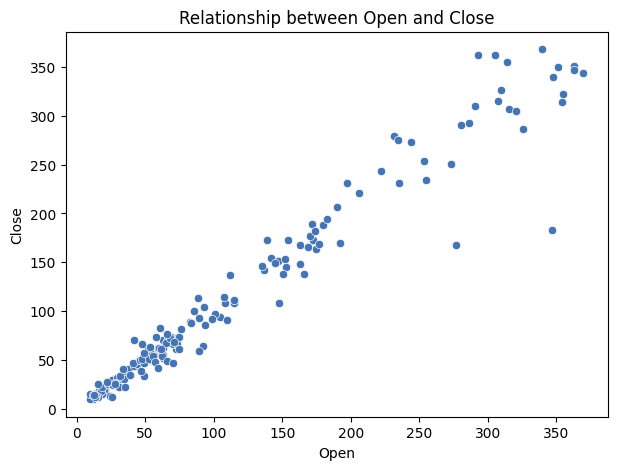

In [ ]:
# Chart - 6 visualization code

# Plotting the chart
plt.figure(figsize=(7,5))
sns.scatterplot(x=yb_df.Open,y=yb_df.Close,color='#4575b4')

# Setting title
plt.title('Relationship between Open and Close')

# Show chart
plt.show()



##### 1. Why did you pick the specific chart?

##### Scatter plot is used to show the relationship between two variables.

#### Chart - 7

Relationship between High and Close

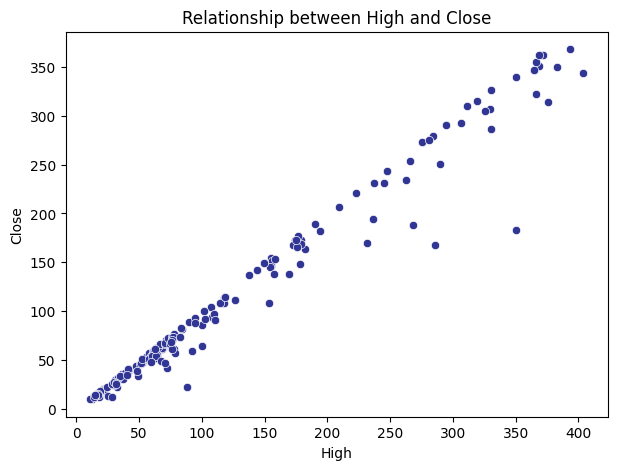

In [ ]:
# Chart - 7 visualization code

# Plotting the chart
plt.figure(figsize=(7,5))
sns.scatterplot(x=yb_df.High,y=yb_df.Close,color='#313695')

# Setting title
plt.title('Relationship between High and Close')

# Show chart
plt.show()



##### 1. Why did you pick the specific chart?

##### Scatter plot is used to show the relationship between two variables.

#### Chart - 8

Relationship between Low and Close

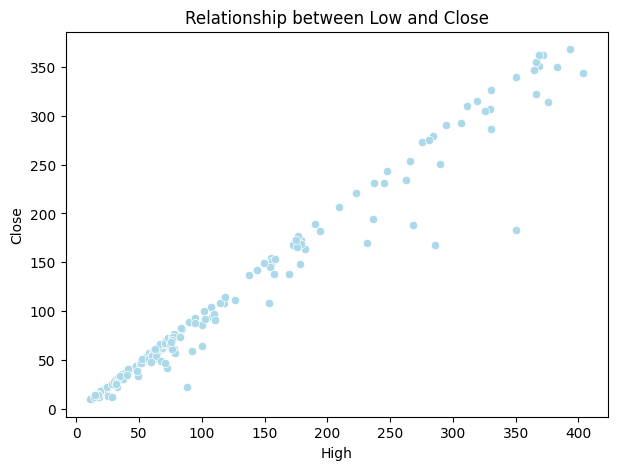

In [ ]:
# Chart - 8 visualization code

# Plotting the chart
plt.figure(figsize=(7,5))
sns.scatterplot(x=yb_df.High,y=yb_df.Close,color='#abd9e9')

# Setting title
plt.title('Relationship between Low and Close')

# Show chart
plt.show()



##### 1. Why did you pick the specific chart?

##### Scatter plot is used to show the relationship between two variables.

#### Chart - 9 - Correlation Heatmap

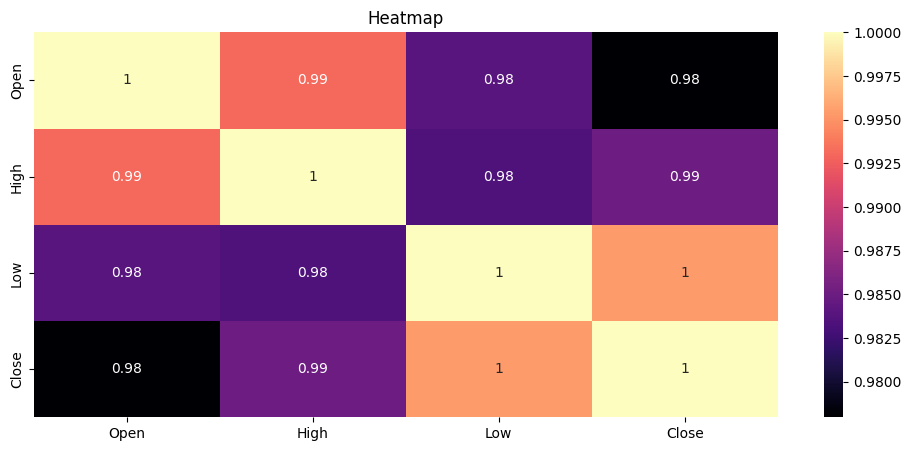

In [ ]:
# Correlation Heatmap visualization code

# Plotting the chart
corr=yb_df.corr()
plt.figure(figsize=(12,5))
sns.heatmap(corr,annot = True,cmap = 'magma')

# Setting Title
plt.title('Heatmap')

# Show chart
plt.show()



##### 1. Why did you pick the specific chart?

Heatmaps are great for showing the distribution of values across a 2D space
and here we have to find the correlation between the variables.

##### 2. What is/are the insight(s) found from the chart?

It is expected that all independent variables are correlated to each other because opening price, high price, low price will not vary much in the finance sector. So, I am going to do feature generation to avoid multicollinearity.



#### Chart - 15 - Pair Plot

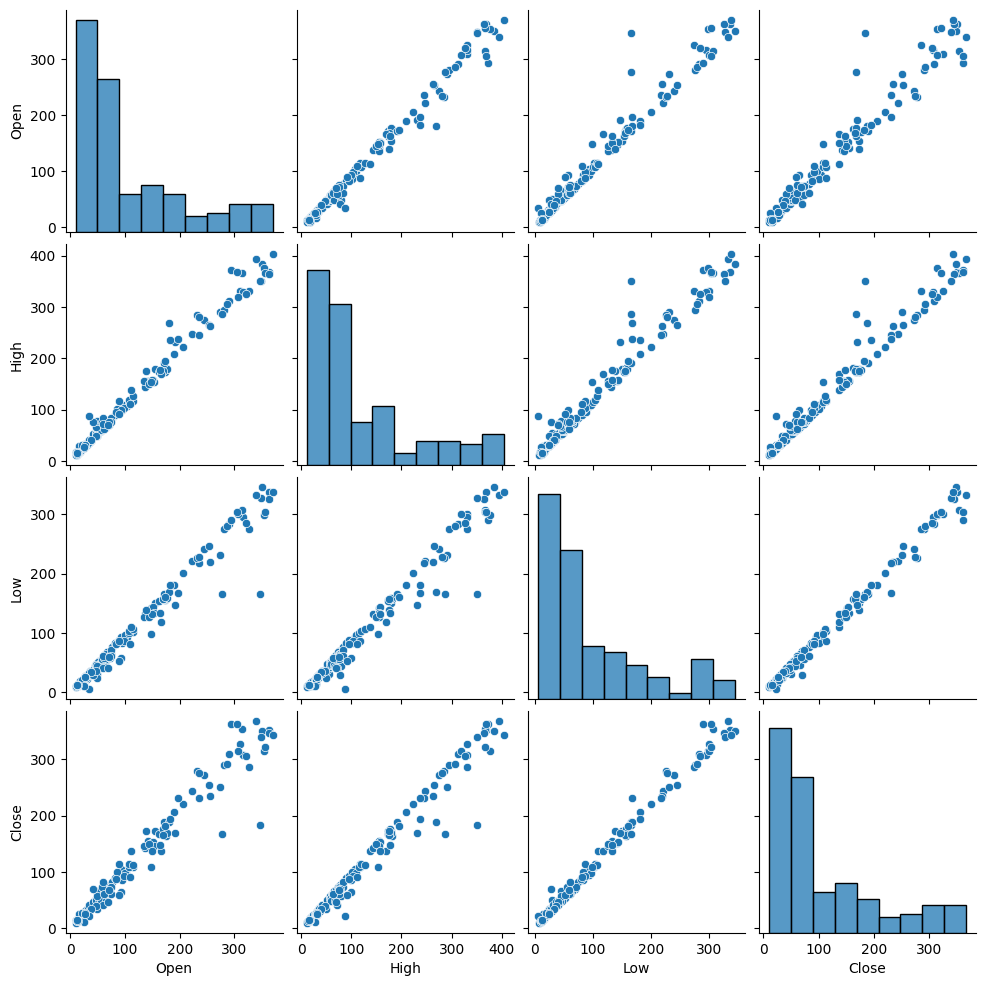

In [ ]:
# Pair Plot visualization code

# Plotting the chart
sns.pairplot(yb_df)

# Show chart
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is a matrix of graphs that enables the visualization of the relationship between each pair of variable in a dataset.

##### 2. What is/are the insight(s) found from the chart?

We can see the relationship between each pair of variable in a dataset.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define  hypothetical statements from the dataset. In the next questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the mean closing prices between the first half and the second half of the dataset.

Alternate Hypothesis (H1): There is a significant difference in the mean closing prices between the first half and the second half of the dataset.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import numpy as np
from scipy import stats

# Divide the dataset into two halves: first half and second half
first_half = yb_df['Close'][yb_df.index.year <= 2017]
second_half = yb_df['Close'][yb_df.index.year >= 2018]

# Calculate the means and standard deviations of the two halves
mean1 = np.mean(first_half)
mean2 = np.mean(second_half)
std1 = np.std(first_half)
std2 = np.std(second_half)

# Calculate the sample sizes
n1 = len(first_half)
n2 = len(second_half)

# Calculate the standard error of the difference between means
standard_error = np.sqrt((std1**2 / n1) + (std2**2 / n2))

# Calculate the z-score
z = (mean1 - mean2) / standard_error

# Calculate the p-value (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in means.")

Reject the null hypothesis. There is a significant difference in means.


##### Which statistical test have you done to obtain P-Value?

I used Z-test to obtain P-value.A z test is a statistical test that is used to check if the means of two data sets are different when the population variance is known.

##### Why did you choose the specific statistical test?

As our dataset has more than 30 records we can calculate mean and standard deviation from it.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement: There is a significant difference in the mean closing prices between months with high opening prices and months with low opening prices.

Null Hypothesis (H0): The mean closing prices in months with high opening prices are equal to or lower than the mean closing prices in months with low opening prices.

Alternative Hypothesis (HA): The mean closing prices in months with high opening prices are higher than the mean closing prices in months with low opening prices..

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Calculate the mean opening and closing prices for each month
yb_df['Month'] = yb_df.index.strftime('%Y-%m')
monthly_data = yb_df.groupby('Month').agg({'Open': 'mean', 'Close': 'mean'})

# Define the threshold for high and low opening prices
threshold = monthly_data['Open'].median()

# Divide the data into groups based on opening prices
high_opening_prices = monthly_data[monthly_data['Open'] > threshold]['Close']
low_opening_prices = monthly_data[monthly_data['Open'] <= threshold]['Close']

# Calculate the sample statistics
mean_high = np.mean(high_opening_prices)
mean_low = np.mean(low_opening_prices)
std_high = np.std(high_opening_prices)
std_low = np.std(low_opening_prices)
n_high = len(high_opening_prices)
n_low = len(low_opening_prices)

# Calculate the z-statistic
z_statistic = (mean_high - mean_low) / np.sqrt((std_high**2 / n_high) + (std_low**2 / n_low))

# Calculate the p-value
p_value = 1 - stats.norm.cdf(z_statistic)

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean closing prices.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean closing prices.")



Reject the null hypothesis. There is a significant difference in the mean closing prices.


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
yb_df.isnull().sum()

Open     0
High     0
Low      0
Close    0
Month    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values in this dataset.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

#Transformation has already done for outliers, so no need to treat outliers.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

# There are no categorical variables in this dataset

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# Dealing with multicollinearity using VIF analysis.
# Calculating VIF(Variation Inflation Factor) to see the correlation between independent variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)



In [ ]:
calc_vif(yb_df[[i for i in df.describe().columns if i not in ['Date','Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

# Creating arrays of our input variable and label to feed the data to the model.
# Create the data of independent variables
x = np.log10(yb_df[independent_variables]).values            # applying log transform on our independent variables.

# Create the dependent variable data
y = np.log10(yb_df[dependent_variable]).values               # applying log transform on our dependent variable.

### 6. Data Scaling

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

As I have only few features, dimensionality reduction is not necessary

In [ ]:
# DImensionality Reduction (If needed)
# No it's not needed

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Not done

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

# splitting the data into a train and a test set. we do this using train test split.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
print("x_train",x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (148, 3)
x_test (37, 3)
y_train (148, 1)
y_test (37, 1)


##### What data splitting ratio have you used and why?

In [ ]:
# Scaling the data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


I have used 80 percent of the data for training the model and 20 % for testing the model.

## ***7. ML Model Implementation***

### 1. Linear Regression


In [ ]:
# ML Model - 1 Implementation
linear_model = LinearRegression()

# Fit the Algorithm
# train the model
linear_model.fit(x_train,y_train)
# test the model
y_pred=linear_model.predict(x_test)

# Predict on the model
y_pred




array([[1.4912247 ],
       [2.14465448],
       [1.67394233],
       [2.14226908],
       [1.82201368],
       [1.50794844],
       [2.36203842],
       [1.21545331],
       [1.1371433 ],
       [2.35044359],
       [2.47496559],
       [1.94884657],
       [2.17801307],
       [1.76486858],
       [2.52493353],
       [2.42732103],
       [1.86087272],
       [1.44166154],
       [2.43034707],
       [1.70644715],
       [0.97157347],
       [2.07290633],
       [2.1784174 ],
       [1.76898738],
       [2.3338384 ],
       [1.71921499],
       [2.40515731],
       [1.12251144],
       [2.02871592],
       [1.72293253],
       [2.57183854],
       [2.55026271],
       [1.86725537],
       [2.22192748],
       [1.59041597],
       [1.67502755],
       [2.41083039]])

In [ ]:
y_test

array([[1.53224464],
       [2.16205634],
       [1.6716356 ],
       [2.15253295],
       [1.79393001],
       [1.47943134],
       [2.36410052],
       [1.20736504],
       [1.13703745],
       [2.2884728 ],
       [2.48415742],
       [1.96047078],
       [2.18554215],
       [1.79504537],
       [2.53096768],
       [2.43941165],
       [1.85648721],
       [1.42862067],
       [2.44575984],
       [1.69757803],
       [0.99913054],
       [2.04805317],
       [2.17011497],
       [1.7707784 ],
       [2.34498141],
       [1.847881  ],
       [2.39941411],
       [1.12742878],
       [2.0342674 ],
       [1.72090317],
       [2.53580029],
       [2.55866058],
       [1.88332068],
       [2.21301278],
       [1.61658053],
       [1.67504474],
       [2.40401223]])

In [ ]:
# Model Coefficients
linear_model.coef_

array([[-0.22992597,  0.33533242,  0.31585415]])

In [ ]:
# Model Intercept
linear_model.intercept_

array([1.79986471])

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

MAE = mean_absolute_error(10**(y_test),10**(y_pred))
print('Mean Absolute Error:',MAE)

MSE = mean_squared_error(10**(y_test),10**(y_pred))
print('Mean Squared Error:',MSE)

RMSE = np.sqrt(MSE)
print('Root Mean Squared Error:',RMSE)

r2 = r2_score(10**(y_test),10**(y_pred))
print('R2 score:',r2)

n = y_test.shape[0] # number of samples in test data
p = x_test.shape[1] # number of input features

adj = 1 - (1-r2_score(10**(y_test),10**(y_pred)))*(n-1)/(n-p-1)
print('Adjusted R2 score:',adj)

Mean Absolute Error: 4.816779252269776
Mean Squared Error: 70.42040616145432
Root Mean Squared Error: 8.3916867292252
R2 score: 0.9937436908107394
Adjusted R2 score: 0.9931749354298975


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Linear Regression is a supervised learning model.It is used to find linear relationship between x and y or dependent and independent variable by fitting a straight line.

Evaluation metrics in this model are:



*   Mean Absolute Error
*   Mean Squared Error
*   Root Mean Squared Error
*   R2 score
*   Adjusted R2 score







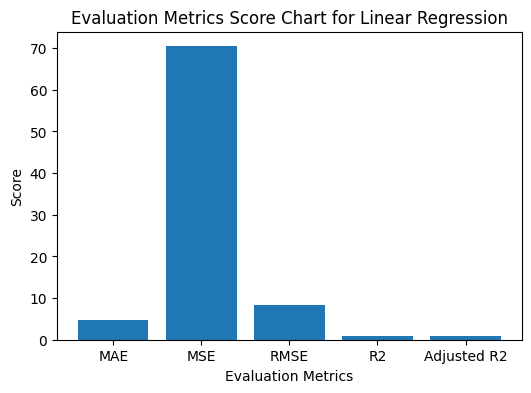

In [ ]:
# Visualizing evaluation Metric Score chart

metrics = ['MAE','MSE', 'RMSE', 'R2', 'Adjusted R2']
scores = [MAE,MSE,RMSE,r2,adj]

# Plot the evaluation metric score chart
plt.figure(figsize=(6, 4))
plt.bar(metrics, scores)
plt.xlabel('Evaluation Metrics')
plt.ylabel('Score')
plt.title('Evaluation Metrics Score Chart for Linear Regression')
plt.show()


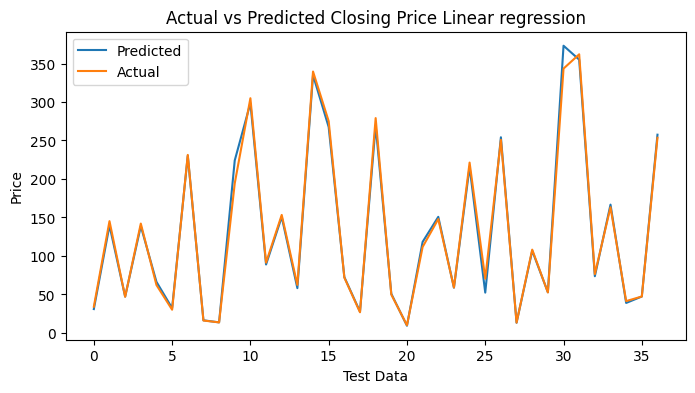

In [ ]:

# Plotting the actual and predicted test data.
plt.figure(figsize=(8,4))
plt.plot(10**y_pred)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing Price Linear regression")
plt.show()

In [ ]:
# Storing the metrics
linear_regessor_list = {'Mean Absolute Error' : MAE,'Mean squared Error' : MSE,
                   'Root Mean squared Error' : RMSE,'R2 score' : r2,'Adjusted R2 score' : adj }

In [ ]:

# converting above dict into a dataframe
metrics_df = pd.DataFrame.from_dict(linear_regessor_list, orient='index').reset_index()


# renaming the columns.
metrics_df = metrics_df.rename(columns={'index':'Metrics',0:'Metrics_Score'})
metrics_df


,Metrics,Metrics_Score
0,Mean Absolute Error,4.816779
1,Mean squared Error,70.420406
2,Root Mean squared Error,8.391687
3,R2 score,0.993744
4,Adjusted R2 score,0.993175


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
parameter = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],

    'positive': [True, False]
}

# Create the grid search object
Lr_gs=GridSearchCV(linear_model,param_grid=parameter,cv=5,scoring='r2')

# Fit the Algorithm
Lr_gs.fit(x_train,y_train)

# Predict on the model
y_pred_test_gs=Lr_gs.predict(x_test)
print(y_pred_test_gs)




[[1.4912247 ]
 [2.14465448]
 [1.67394233]
 [2.14226908]
 [1.82201368]
 [1.50794844]
 [2.36203842]
 [1.21545331]
 [1.1371433 ]
 [2.35044359]
 [2.47496559]
 [1.94884657]
 [2.17801307]
 [1.76486858]
 [2.52493353]
 [2.42732103]
 [1.86087272]
 [1.44166154]
 [2.43034707]
 [1.70644715]
 [0.97157347]
 [2.07290633]
 [2.1784174 ]
 [1.76898738]
 [2.3338384 ]
 [1.71921499]
 [2.40515731]
 [1.12251144]
 [2.02871592]
 [1.72293253]
 [2.57183854]
 [2.55026271]
 [1.86725537]
 [2.22192748]
 [1.59041597]
 [1.67502755]
 [2.41083039]]


In [ ]:
# checking the performance using evaluation metrics.
MAE_lr_gs = mean_absolute_error(10**(y_test),10**(y_pred_test_gs))
print('Mean Absolute Error:',MAE_lr_gs)

MSE_lr_gs  = mean_squared_error(10**(y_test),10**(y_pred_test_gs))
print("Mean squared Error :" , MSE_lr_gs)

RMSE_lr_gs = np.sqrt(MSE_lr_gs)
print("Root Mean squared Error :" ,RMSE_lr_gs)

R2_lr_gs = r2_score(10**(y_test), 10**(y_pred_test_gs))
print("R2 score :" ,R2_lr_gs)

n = y_test.shape[0] # number of samples in test data
p = x_test.shape[1] # number of input features


Adjusted_R2_lr_gs = 1-(1-r2_score(10**y_test, 10**y_pred_test_gs))*(n-1)/(n-p-1)
print("Adjusted R2 score: ", Adjusted_R2_lr_gs)

Mean Absolute Error: 4.816779252269776
Mean squared Error : 70.42040616145432
Root Mean squared Error : 8.3916867292252
R2 score : 0.9937436908107394
Adjusted R2 score:  0.9931749354298975


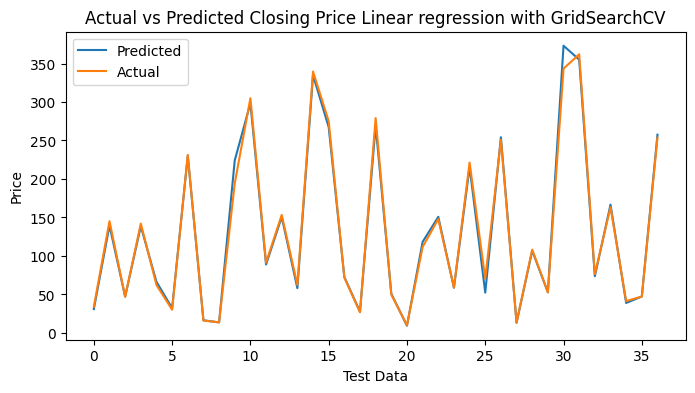

In [ ]:
# Plotting the actual and predicted test data.
plt.figure(figsize=(8,4))
plt.plot(10**y_pred_test_gs)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing Price Linear regression with GridSearchCV")
plt.show()

### 2. Random Forest

In [ ]:

# ML Model - 2 Implementation
rf = RandomForestRegressor()

# Fit the Algorithm
rf.fit(x_train,y_train)

# Predict on the model
y_pred_rf = rf.predict(x_test)
print(y_pred_rf)

[1.52601508 2.17408994 1.64597842 2.16484972 1.81828652 1.49334686
 2.38274438 1.23341971 1.1313003  2.30700308 2.48576405 1.9797446
 2.18011512 1.77519265 2.5391592  2.40953307 1.84851061 1.43210651
 2.40834461 1.70745514 1.06906279 2.08699756 2.20989654 1.75465529
 2.36696483 1.61476402 2.44287945 1.11350676 2.04518696 1.75015634
 2.54887754 2.50030826 1.85231043 2.23133827 1.59482557 1.69362403
 2.40994529]


In [ ]:
# checking the performance using evaluation metrics.
MAE_rf = mean_absolute_error(10**(y_test),10**(y_pred_rf))
print('Mean Absolute Error:',MAE_rf)

MSE_rf  = mean_squared_error(10**(y_test),10**(y_pred_rf))
print("Mean squared Error :" , MSE_rf)

RMSE_rf = np.sqrt(MSE_rf)
print("Root Mean squared Error :" ,RMSE_rf)

R2_rf = r2_score(10**(y_test), 10**(y_pred_rf))
print("R2 score :" ,R2_rf)

n = y_test.shape[0] # number of samples in test data
p = x_test.shape[1] # number of input features


Adjusted_R2_rf = 1-(1-r2_score(10**y_test, 10**y_pred_rf))*(n-1)/(n-p-1)
print("Adjusted R2 score: ", Adjusted_R2_rf)

Mean Absolute Error: 7.4212671258504095
Mean squared Error : 147.9688998500838
Root Mean squared Error : 12.164246785152125
R2 score : 0.9868541060990986
Adjusted R2 score:  0.9856590248353804


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

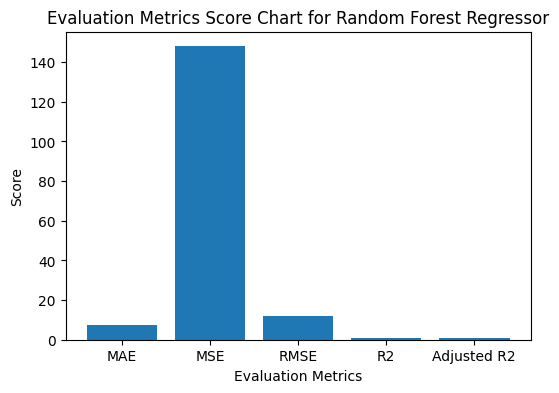

In [ ]:
# Visualizing evaluation Metric Score chart
metrics = ['MAE','MSE', 'RMSE', 'R2', 'Adjusted R2']
scores = [MAE_rf,MSE_rf,RMSE_rf,R2_rf,Adjusted_R2_rf]

# Plot the evaluation metric score chart
plt.figure(figsize=(6, 4))
plt.bar(metrics, scores)
plt.xlabel('Evaluation Metrics')
plt.ylabel('Score')
plt.title('Evaluation Metrics Score Chart for Random Forest Regressor')
plt.show()



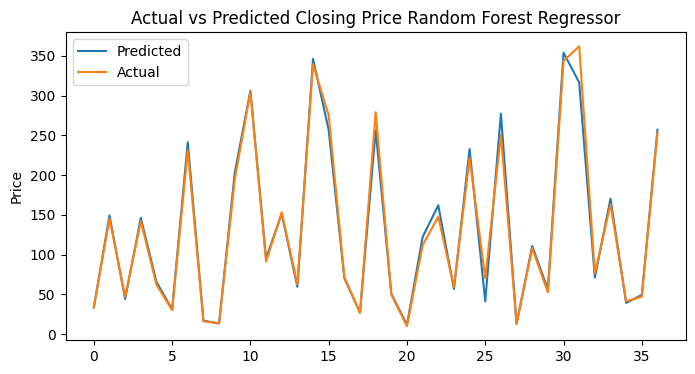

In [ ]:
# Plotting the predicted values v/s actual values

plt.figure(figsize=(8,4))
plt.plot(10**y_pred_rf)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing Price Random Forest Regressor")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50,80,100,200,300],
    'max_depth': [1,2,6,7,8,9,10,20,30,40],
    'min_samples_split':[10,20,30,40,50,100,150,200],
    'min_samples_leaf': [1,2,8,10,20,40,50]


}


# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(rf, param_grid_rf,verbose=2, cv=5, scoring='r2')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(x_train, y_train)

# Get the best estimator
best_model_rf_rs = random_search.best_estimator_




Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=8, min_samples_leaf=8, min_samples_split=40, n_estimators=100; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=8, min_samples_split=40, n_estimators=100; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=8, min_samples_split=40, n_estimators=100; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=8, min_samples_split=40, n_estimators=100; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=8, min_samples_split=40, n_estimators=100; total time=   0.1s
[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=100, n_estimators=200; total time=   0.3s
[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=100, n_estimators=200; total time=   0.3s
[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=100, n_estimators=200; total time=   0.3s
[CV] END max_depth=9, min_samples_leaf=20, min_samples_split=100, n_estimators=200; total time=   0.2s
[CV] END max_depth=9, 

In [ ]:
best_model_rf_rs.feature_importances_

array([0.07013907, 0.11985388, 0.81000706])

In [ ]:
print(best_model_rf_rs)

RandomForestRegressor(max_depth=6, min_samples_leaf=10, min_samples_split=20)


In [ ]:
# Predict on the model
y_pred_test_rf_rs= random_search.predict(x_test)
print(y_pred_test_rf_rs)


[1.53836685 2.18216412 1.65347117 2.17164342 1.81632453 1.46163726
 2.46758828 1.21629259 1.15686389 2.37337617 2.47455869 2.01902445
 2.18791645 1.77483536 2.47455869 2.46973046 1.83351381 1.43378855
 2.46973046 1.72061853 1.15686389 2.09531913 2.18561579 1.75978034
 2.44805776 1.57259546 2.46973046 1.15686389 2.03083269 1.752924
 2.47455869 2.47455869 1.83243745 2.20033685 1.60679405 1.69391701
 2.4722226 ]


In [ ]:
# checking the performance using evaluation metrics.
MAE_rf_rs = mean_absolute_error(10**(y_test),10**(y_pred_test_rf_rs))
print('Mean Absolute Error:',MAE_rf_rs)

MSE_rf_rs  = mean_squared_error(10**(y_test),10**(y_pred_test_rf_rs))
print("Mean squared Error :" , MSE_rf_rs)

RMSE_rf_rs = np.sqrt(MSE_rf)
print("Root Mean squared Error :" ,RMSE_rf_rs)

R2_rf_rs = r2_score(10**(y_test), 10**(y_pred_test_rf_rs))
print("R2 score :" ,R2_rf_rs)

n = y_test.shape[0] # number of samples in test data
p = x_test.shape[1] # number of input features


Adjusted_R2_rf_rs = 1-(1-r2_score(10**y_test, 10**y_pred_test_rf_rs))*(n-1)/(n-p-1)
print("Adjusted R2 score: ", Adjusted_R2_rf_rs)

Mean Absolute Error: 15.32940802996379
Mean squared Error : 626.6408400420546
Root Mean squared Error : 12.164246785152125
R2 score : 0.9443278012777638
Adjusted R2 score:  0.9392666923030151


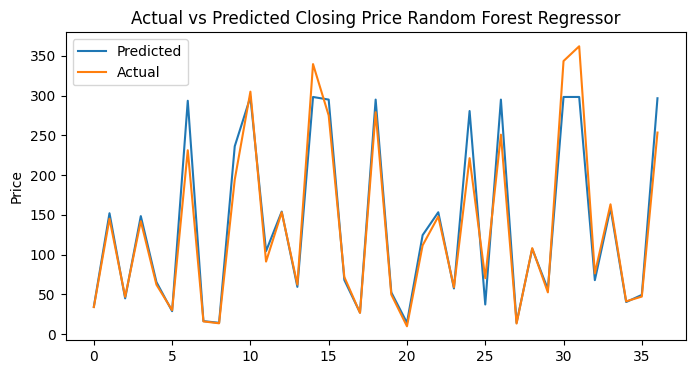

In [ ]:
# Plotting the predicted values v/s actual values

plt.figure(figsize=(8,4))
plt.plot(10**y_pred_test_rf_rs)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing Price Random Forest Regressor")
plt.show()

### ML Model - 3

In [ ]:

# ML Model - 3 Implementation

xgboost = XGBRegressor(objective= 'reg:squarederror')

# Fit the Algorithm
xgboost.fit(x_train,y_train)

# Predict on the model
y_pred_test_xg= xgboost.predict(x_test)
print(y_pred_test_xg)



[1.4747968 2.1447768 1.6525519 2.1644666 1.8573838 1.4980407 2.325744
 1.2644088 1.1041582 2.3111906 2.4887085 1.9616709 2.172486  1.7905618
 2.5407572 2.3839498 1.85807   1.435284  2.3839498 1.7157915 1.0618324
 2.0588994 2.2065613 1.736439  2.3448746 1.6104287 2.384712  1.0546362
 1.9878122 1.7409465 2.5462637 2.5047622 1.8574986 2.231942  1.5926253
 1.6853044 2.42801  ]


In [ ]:
# checking the performance using evaluation metrics.
MAE_xgboost = mean_absolute_error(10**(y_test),10**(y_pred_test_xg))
print('Mean Absolute Error:',MAE_xgboost)

MSE_xgboost  = mean_squared_error(10**(y_test),10**(y_pred_test_xg))
print("Mean squared Error :" , MSE_xgboost)

RMSE_xgboost = np.sqrt(MSE_xgboost)
print("Root Mean squared Error :" ,RMSE_xgboost)

R2_xgboost = r2_score(10**(y_test), 10**(y_pred_test_xg))
print("R2 score :" ,R2_xgboost)

n = y_test.shape[0] # number of samples in test data
p = x_test.shape[1] # number of input features


Adjusted_R2_xgboost = 1-(1-r2_score(10**y_test, 10**y_pred_test_xg))*(n-1)/(n-p-1)
print("Adjusted R2 score: ", Adjusted_R2_xgboost)

Mean Absolute Error: 8.240397022350423
Mean squared Error : 179.42997826983856
Root Mean squared Error : 13.395147564317407
R2 score : 0.9840590322739026
Adjusted R2 score:  0.9826098533897119


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

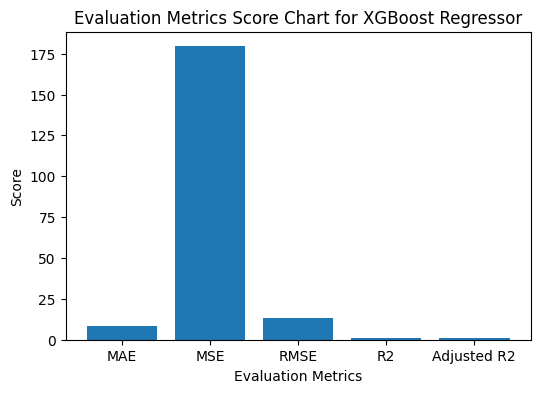

In [ ]:
# Visualizing evaluation Metric Score chart
metrics = ['MAE','MSE', 'RMSE', 'R2', 'Adjusted R2']
scores = [MAE_xgboost,MSE_xgboost,RMSE_xgboost,R2_xgboost,Adjusted_R2_xgboost]

# Plot the evaluation metric score chart
plt.figure(figsize=(6, 4))
plt.bar(metrics, scores)
plt.xlabel('Evaluation Metrics')
plt.ylabel('Score')
plt.title('Evaluation Metrics Score Chart for XGBoost Regressor')
plt.show()



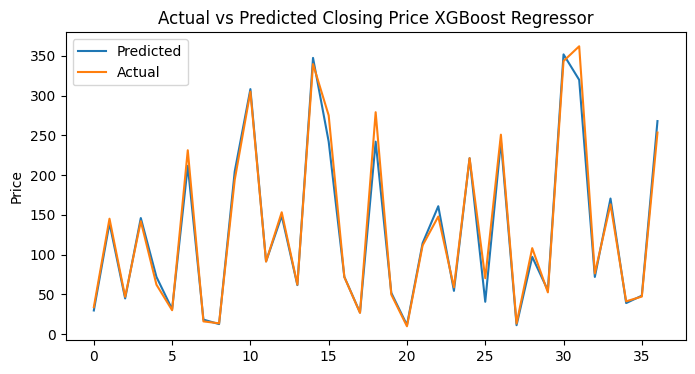

In [ ]:
# Plotting the predicted values v/s actual values

plt.figure(figsize=(8,4))
plt.plot(10**y_pred_test_xg)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing Price XGBoost Regressor")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define the parameter grid for hyperparameter tuning
param_grid_xg = {
    'n_estimators': [50,80,100,200,300],
    'max_depth': [2,4,6,8],
    'colsample_bytree': [0.7, 0.8],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]

}

# Create the GridSearchCV object
xgb_gs = GridSearchCV(estimator=xgboost, param_grid=param_grid_xg, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
xgb_gs.fit(x_train, y_train)

# Get the best estimator
best_model_xgb_gs = xgb_gs.best_estimator_


# Predict on the model
y_pred_test_xgb_gs= xgb_gs.predict(x_test)

In [ ]:
best_model_xgb_gs.feature_importances_

array([0.25947282, 0.5970629 , 0.14346431], dtype=float32)

In [ ]:
print(best_model_xgb_gs)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [ ]:
xgb_gs.score(x_train,y_train)

0.9863759960854729

In [ ]:
# checking the performance using evaluation metrics.
MAE_xgb_gs = mean_absolute_error(10**(y_test),10**(y_pred_test_xgb_gs))
print('Mean Absolute Error:',MAE_xgb_gs)

MSE_xgb_gs  = mean_squared_error(10**(y_test),10**(y_pred_test_xgb_gs))
print("Mean squared Error :" , MSE_xgb_gs)

RMSE_xgb_gs = np.sqrt(MSE_xgboost)
print("Root Mean squared Error :" ,RMSE_xgb_gs)

R2_xgb_gs = r2_score(10**(y_test), 10**(y_pred_test_xgb_gs))
print("R2 score :" ,R2_xgb_gs)

n = y_test.shape[0] # number of samples in test data
p = x_test.shape[1] # number of input features


Adjusted_R2_xgb_gs = 1-(1-r2_score(10**y_test, 10**y_pred_test_xgb_gs))*(n-1)/(n-p-1)
print("Adjusted R2 score: ", Adjusted_R2_xgb_gs)

Mean Absolute Error: 14.301072489764238
Mean squared Error : 549.0297447979158
Root Mean squared Error : 13.395147564317407
R2 score : 0.951222947654103
Adjusted R2 score:  0.9467886701681123


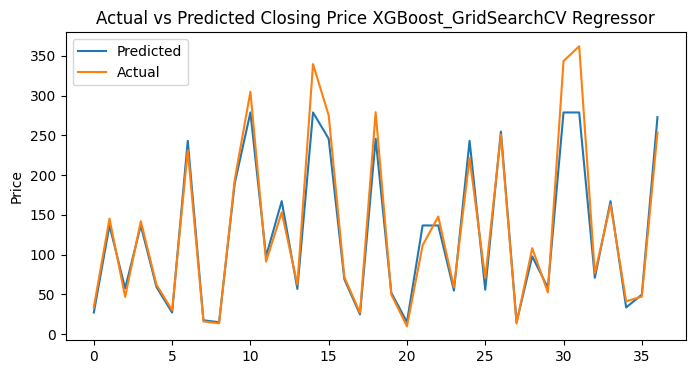

In [ ]:
# Plotting the predicted values v/s actual values

plt.figure(figsize=(8,4))
plt.plot(10**y_pred_test_xgb_gs)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing Price XGBoost_GridSearchCV Regressor")
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I considered R2. adjusted R2 and RMSE as evaluation metrics.

R2 score is a measure of how well the model fits the data.

It ranges from 0 to 1, with a higher value indicating a better fit which means that the model is able to explain a large portion of the variance in the data which could have a positive impact on decision-making.

The adjusted R-squared provides a penalized measure of model fit that takes into account both the explanatory power of the model and the complexity of the model. It is particularly useful when comparing models with different numbers of predictors. A higher adjusted R-squared indicates a better fit of the model, as it reflects the proportion of variance in the dependent variable that is explained by the independent variables, adjusted for the model complexity.

RMSE is a measure of the average squared error of the model's predictions.

It is calculated as the square root of the mean squared error (MSE).

In a business context, a low RMSE can indicate that the model is making relatively small errors.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I choose Linear Regression model as it has the highest  R2 score as compared to other model.

# **Conclusion**

The main goal of the project is to create a machine learning model which can predict the closing price of Yes Bank stock for that month, keeping in mind of the fraud case happened in 2018.

Using data visualization on our target variable, we can clearly see the impact of 2018 fraud case involving Rana Kapoor as the stock prices decline dramatically during that period.

All the variables in the dataset are positively skewed and we applied log transormation to make them normally distributed

I have developed three model:


*   Linear Regression
*   Random Forest Regressor
*   XGBoost Regressor

Found the most suitable basic Linear Regression model with highest R2 score as compared to other model.

Given the dataset and features, Our model is performing well on all data-points. With our model making predictions with such high accuracy, we can confidently deploy this model for further predictive tasks using future data.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***